In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [104]:
column_names = ['feature1', 'feature2', 'feature3', 'feature4', 'feature5',
                'feature6', 'feature7', 'feature8', 'feature9', 'feature10',
                'feature11', 'feature12', 'target']

In [105]:
train_data = pd.read_csv('Train_Arabic_digit.csv',names=column_names, dtype=float)
test_data = pd.read_csv('Test_Arabic_Digit.csv', names=column_names, dtype=float)

In [106]:
train_data.shape

(223727, 13)

In [107]:
test_data.shape

(87063, 13)

In [108]:
train_data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,target
0,0.61719,-1.99840,0.50071,-1.4153,-1.7612,-1.4585,-0.64124,-1.7181,0.477970,-0.49956,0.27200,0.19890,0.710870
1,2.15700,-0.86296,0.27370,-2.8759,-2.6280,-1.3429,0.52652,-2.2672,-0.118320,0.20332,0.78466,-0.37859,0.098151
2,2.14870,-0.36076,0.73685,-2.1627,-1.9814,-1.4611,-0.51958,-2.0562,0.055287,-0.95875,0.13657,0.14616,0.308290
3,2.32710,-0.26817,0.87557,-2.2554,-2.4136,-1.7773,-0.31876,-2.0243,-0.190520,-0.70014,0.25429,-0.55522,0.737700
4,2.74710,-0.36775,0.51801,-2.4645,-2.1984,-1.6846,-0.29863,-2.2766,-0.648640,-1.01570,0.85915,-0.20888,0.135300


In [109]:
test_data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,target
0,1.2572,-8.2449,0.8483,-1.5782,0.4736,-0.063273,0.424810,0.50017,0.70420,0.28973,0.076053,0.025883,-0.22968
1,3.3638,-9.0154,1.4104,-1.5884,1.3725,-0.334810,1.052900,0.89804,0.79525,0.74112,-0.153510,0.517180,0.44204
2,3.4461,-9.4871,1.3425,-1.4066,1.4422,0.124470,0.581990,0.88984,0.90260,0.11521,-0.047091,0.409890,0.81545
3,4.7730,-10.0070,1.2143,-2.0118,2.0864,0.285620,0.528680,0.33971,1.16880,0.42569,-0.470990,0.508600,-0.33061
4,5.3317,-9.6834,1.5131,-2.3545,1.6933,0.066311,-0.088666,0.16826,0.24546,-0.34749,-0.098748,0.810930,-0.12837


In [110]:
null_values = train_data.isnull().any()

# Print columns with null values, if any
if null_values.any():
    print("Columns with null values:")
    print(null_values[null_values])
else:
    print("No null values found in the dataset.")

No null values found in the dataset.


In [111]:
null_values = train_data.isnull().any()

# Print columns with null values, if any
if null_values.any():
    print("Columns with null values:")
    print(null_values[null_values])
else:
    print("No null values found in the dataset.")

No null values found in the dataset.


In [112]:

# Count missing values in each column
missing_values_count = train_data.isna().sum()

# Print the count of missing values in each column
print("Missing values count in each column:")
print(missing_values_count)

Missing values count in each column:
feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
target       0
dtype: int64


In [113]:
# Count missing values in each column
missing_values_count = train_data.isna().sum()

# Print the count of missing values in each column
print("Missing values count in each column:")
print(missing_values_count)

Missing values count in each column:
feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
target       0
dtype: int64


In [114]:
# Count missing values in each column
missing_values_count = test_data.isna().sum()

# Print the count of missing values in each column
print("Missing values count in each column:")
print(missing_values_count)

Missing values count in each column:
feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
target       0
dtype: int64


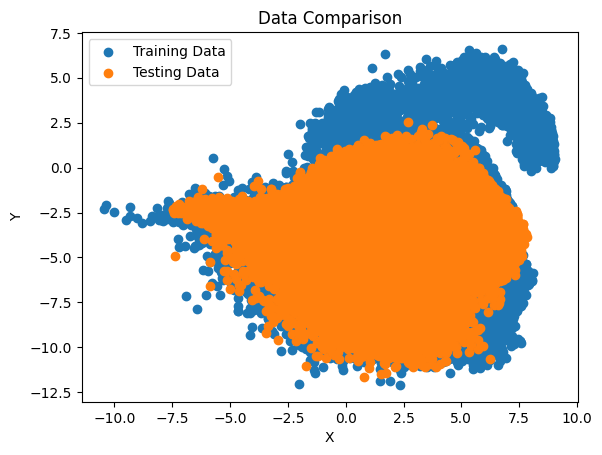

In [115]:

# Plot the data from the first CSV file
plt.scatter(train_data.iloc[:, 0], train_data.iloc[:, 1], label='Training Data')

# Plot the data from the second CSV file
plt.scatter(test_data.iloc[:, 0], test_data.iloc[:, 1], label='Testing Data')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Comparison')
plt.legend()

# Show the plot
plt.show()


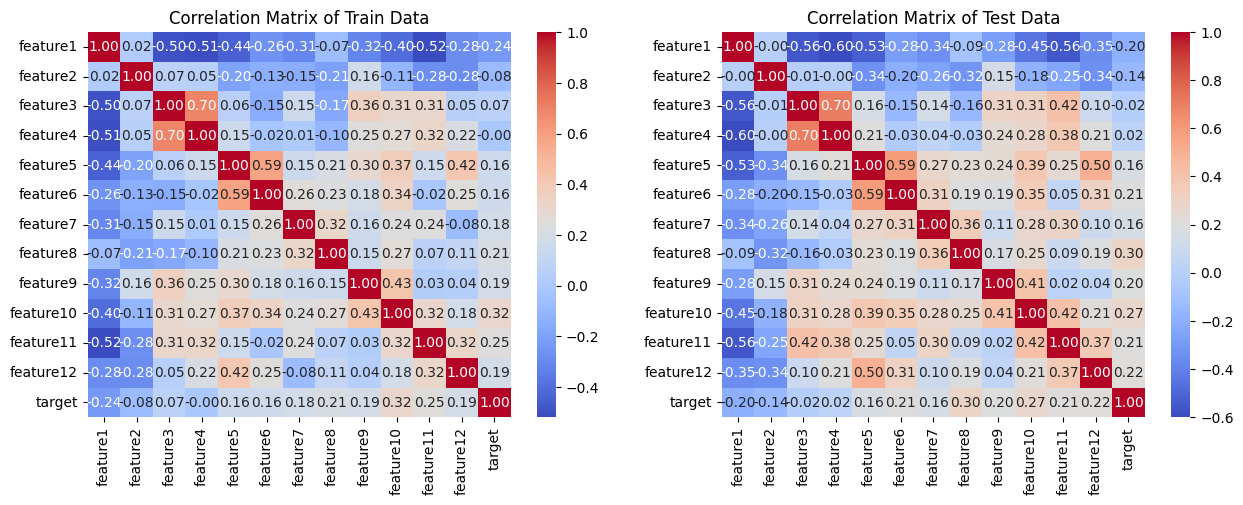

In [116]:

# Calculate correlation matrix
correlation_matrixlr1 = train_data.corr()
correlation_matrixlr2 = test_data.corr()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot heatmap for correlation matrix of train data
sns.heatmap(correlation_matrixlr1, ax=axs[0], annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
axs[0].set_title('Correlation Matrix of Train Data')

# Plot heatmap for correlation matrix of test data
sns.heatmap(correlation_matrixlr2, ax=axs[1], annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
axs[1].set_title('Correlation Matrix of Test Data')

plt.show()

In [117]:
#LINEAR REGRESSION

In [118]:
X_trainlr = train_data.drop(columns=['target'])
y_trainlr = train_data['target']

In [119]:
X_testlr = test_data.drop(columns=['target'])
y_testlr = test_data['target']

In [120]:
modellr = LinearRegression()
modellr.fit(X_trainlr, y_trainlr)

LinearRegression()

In [121]:
train_predictionslr = modellr.predict(X_trainlr)
test_predictionslr = modellr.predict(X_testlr)

In [122]:
# Hyperparameter tuning for Linear Regression
linear_params = {}
linear_model = LinearRegression()
linear_grid_search = GridSearchCV(linear_model, param_grid=linear_params, scoring='neg_mean_squared_error', cv=5)
linear_grid_search.fit(X_trainlr, y_trainlr)

GridSearchCV(cv=5, estimator=LinearRegression(), param_grid={},
             scoring='neg_mean_squared_error')

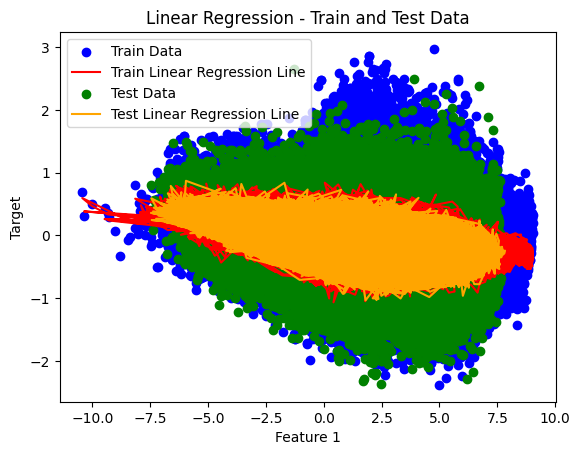

In [124]:
plt.scatter(X_trainlr['feature1'], y_trainlr, color='blue', label='Train Data')
plt.plot(X_trainlr['feature1'], train_predictionslr, color='red', label='Train Linear Regression Line')
plt.scatter(X_testlr['feature1'], y_testlr, color='green', label='Test Data')
plt.plot(X_testlr['feature1'], test_predictionslr, color='orange', label='Test Linear Regression Line ')

plt.xlabel("Feature 1")
plt.ylabel("Target")
plt.title("Linear Regression - Train and Test Data")
plt.legend(loc='upper left')
plt.show()

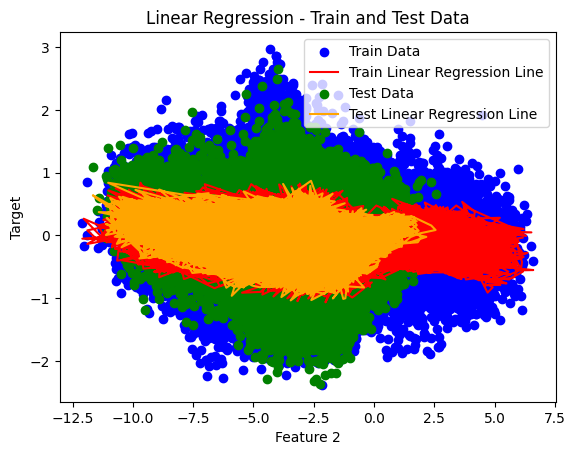

In [125]:
plt.scatter(X_trainlr['feature2'], y_trainlr, color='blue', label='Train Data')
plt.plot(X_trainlr['feature2'], train_predictionslr, color='red', label='Train Linear Regression Line')
plt.scatter(X_testlr['feature2'], y_testlr, color='green', label='Test Data')
plt.plot(X_testlr['feature2'], test_predictionslr, color='orange', label='Test Linear Regression Line ')

plt.xlabel("Feature 2")
plt.ylabel("Target")
plt.title("Linear Regression - Train and Test Data")
plt.legend(loc='upper right')
plt.show()


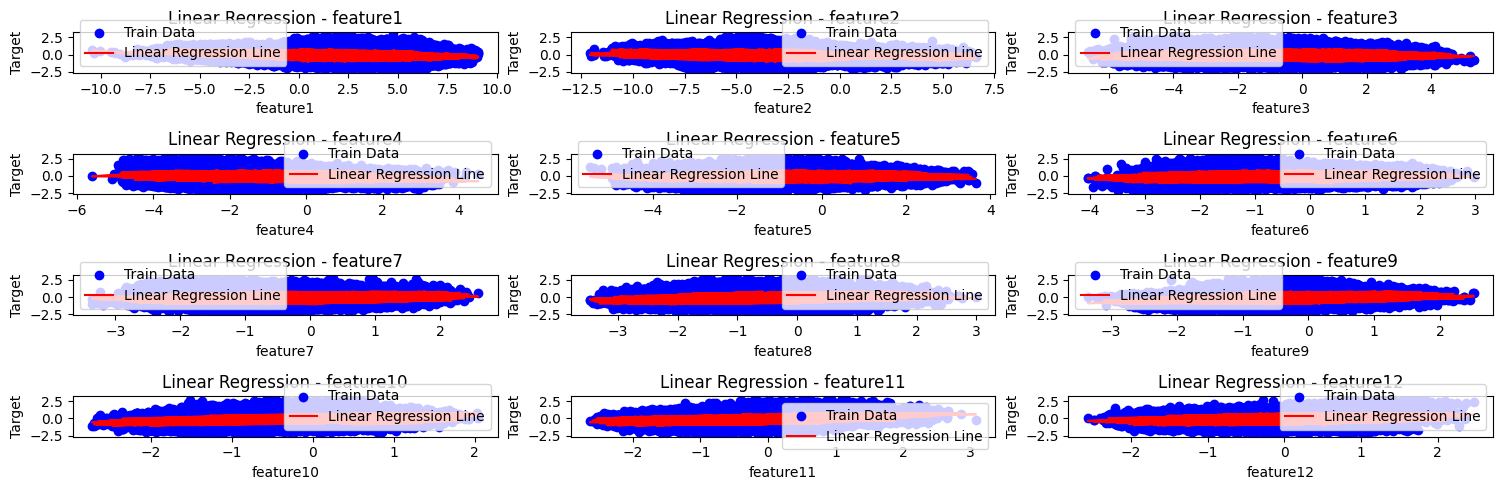

In [ ]:
num_features = X_trainlr.shape[1]
num_rows = int(np.ceil(num_features / 3)) 
num_cols = min(num_features, 3)            
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))
axes = axes.flatten()
for i, ax in enumerate(axes):
    if i < num_features:
        feature_name = X_trainlr.columns[i]
        ax.scatter(X_trainlr[feature_name], y_trainlr, color='blue', label='Train Data')
        ax.plot(X_trainlr[feature_name], modellr.predict(X_trainlr), color='red', label='Linear Regression Line')
        ax.set_xlabel(feature_name)
        ax.set_ylabel('Target')
        ax.set_title('Linear Regression - {}'.format(feature_name))
        ax.legend()
for i in range(num_features, len(axes)):
    axes[i].axis('off')
plt.tight_layout()
plt.show()
correlation_matrix = train_data.corr()

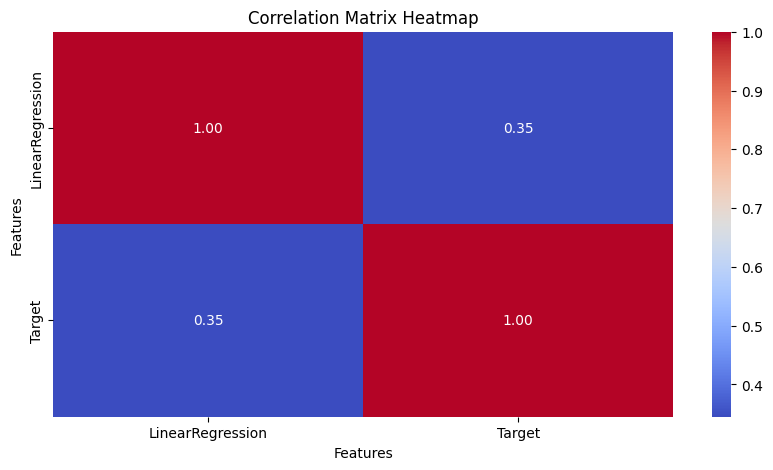

In [126]:
min_length = min(len(y_trainlr), len(train_predictionslr))
y_trainlr = y_trainlr[:min_length]
y_pred_traindt = train_predictionslr[:min_length]
predictions_df = pd.DataFrame({
    'LinearRegression': train_predictionslr,
    'Target': y_trainlr  
})
limited_predictions_lr = predictions_df.iloc[:10000, :10000]
correlation_matrix = limited_predictions_lr.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [127]:

# Predictions on test data
y_pred_testlr = modellr.predict(X_testlr)
# Calculate Mean Squared Error (MSE)
mse_testlr = mean_squared_error(y_testlr, y_pred_testlr)
r2_testlr = r2_score(y_testlr, y_pred_testlr)
print("Mean Squared Error (MSE) on Test Data of Linear Regression :", mse_testlr)
print("R^2 Score on Test Data of Linear regression:", r2_testlr)

Mean Squared Error (MSE) on Test Data of Linear Regression : 0.22771235608984464
R^2 Score on Test Data of Linear regression: 0.15067389296324707


In [ ]:

#DECISION TREE REGRESSOR


In [ ]:
X_traindt = train_data.drop(columns=['target'])
y_traindt = train_data['target']

In [ ]:
X_testdt = test_data.drop(columns=['target'])
y_testdt = test_data['target']

In [ ]:
# Hyperparameter tuning for Decision Tree Regression
dt_params = {'max_depth': [None, 1, 5, 10, 20]}
dt_model = DecisionTreeRegressor()
dt_grid_search = GridSearchCV(dt_model, param_grid=dt_params, scoring='neg_mean_squared_error', cv=5)
dt_grid_search.fit(X_traindt, y_traindt)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 1, 5, 10, 20]},
             scoring='neg_mean_squared_error')

In [ ]:
# Initialize Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(max_depth=3,random_state=42)
tree_regressor.fit(X_traindt, y_traindt)
# Predictions on test data
y_pred_traindt = tree_regressor.predict(X_testdt)

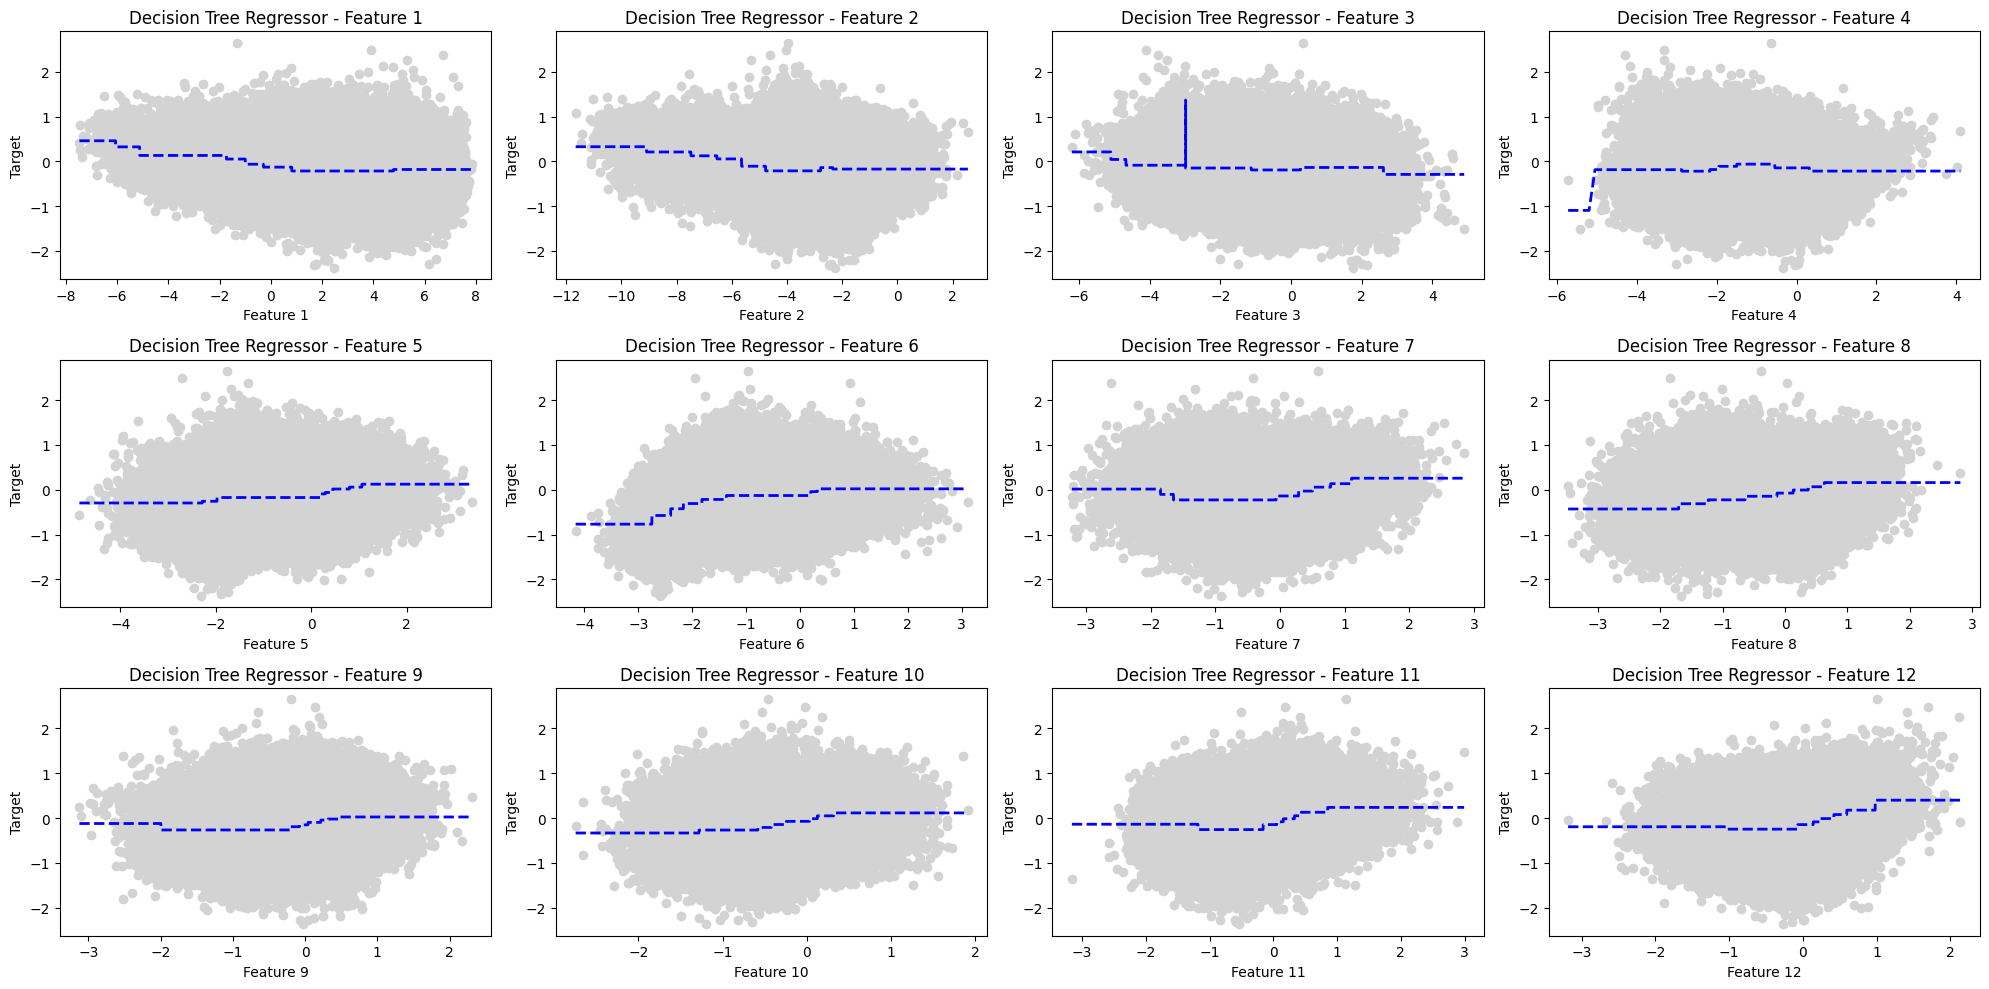

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(20, 10))
axes = axes.flatten()
for feature in range(12):
    x = test_data[['feature{}'.format(feature + 1)]].values
    y = test_data['target'].values
    tree_regressor.fit(x, y)
    sort_idx = x.flatten().argsort()
    ax = axes[feature]
    ax.scatter(x, y, color='lightgray')
    ax.plot(x[sort_idx], tree_regressor.predict(x)[sort_idx], color='blue', lw=2, linestyle='--')
    ax.set_xlabel('Feature {}'.format(feature + 1))
    ax.set_ylabel('Target')
    ax.set_title('Decision Tree Regressor - Feature {}'.format(feature + 1))
for i in range(12, len(axes)):
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate Mean Squared Error (MSE) and R^2 score
mse_testdt = mean_squared_error(y_testdt, y_pred_traindt)
r2_testdt = r2_score(y_testdt, y_pred_traindt)
print("Decision Tree Regressor:")
print("Mean Squared Error (MSE) on Test Data:", mse_testdt)
print("R^2 Score on Test Data:", r2_testdt)

Decision Tree Regressor:
Mean Squared Error (MSE) on Test Data: 0.23520401360612522
R^2 Score on Test Data: 0.12273135869407137


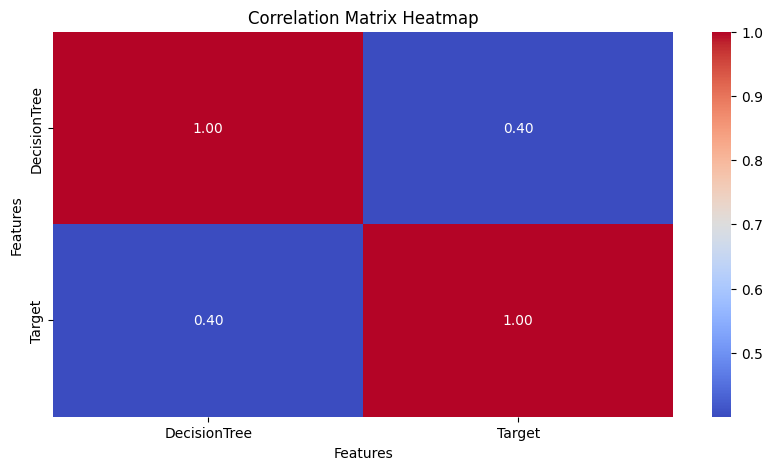

In [ ]:
min_length = min(len(y_traindt), len(y_pred_traindt))
y_traindt = y_traindt[:min_length]
y_pred_traindt = y_pred_traindt[:min_length]
predictions_df = pd.DataFrame({
    'DecisionTree': y_pred_traindt,
    'Target': y_traindt 
})
limited_predictions_df = predictions_df.iloc[:100000, :100000]
correlation_matrix = limited_predictions_df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [ ]:
#RANSAC REGRESSION

In [132]:
X_trainrr = train_data.drop(columns=['target'])
y_trainrr = train_data['target']

In [133]:
X_testrr = test_data.drop(columns=['target'])
y_testrr = test_data['target']

In [134]:
# Hyperparameter tuning for RANSAC Regression
ransac_params = {'max_trials': [50, 100, 200]}
ransac_model = RANSACRegressor()
ransac_grid_search = GridSearchCV(ransac_model, param_grid=ransac_params, scoring='neg_mean_squared_error', cv=5)
ransac_grid_search.fit(X_trainrr, y_trainrr)

GridSearchCV(cv=5, estimator=RANSACRegressor(),
             param_grid={'max_trials': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [135]:
# Initialize RANSAC Regressor
ransac_regressor = RANSACRegressor()
# Train the model
ransac_regressor.fit(X_trainrr, y_trainrr)
# Predictions on test data
y_pred_testrr = ransac_regressor.predict(X_testrr)

In [136]:
mse_testrr = mean_squared_error(y_testrr, y_pred_testrr)
r2_testrr = r2_score(y_testrr, y_pred_testrr)
print("RANSAC Regressor:")
print("Mean Squared Error (MSE) on Test Data:", mse_testrr)
print("R^2 Score on Test Data:", r2_testrr)

RANSAC Regressor:
Mean Squared Error (MSE) on Test Data: 0.4088504956256961
R^2 Score on Test Data: -0.5249387682450217


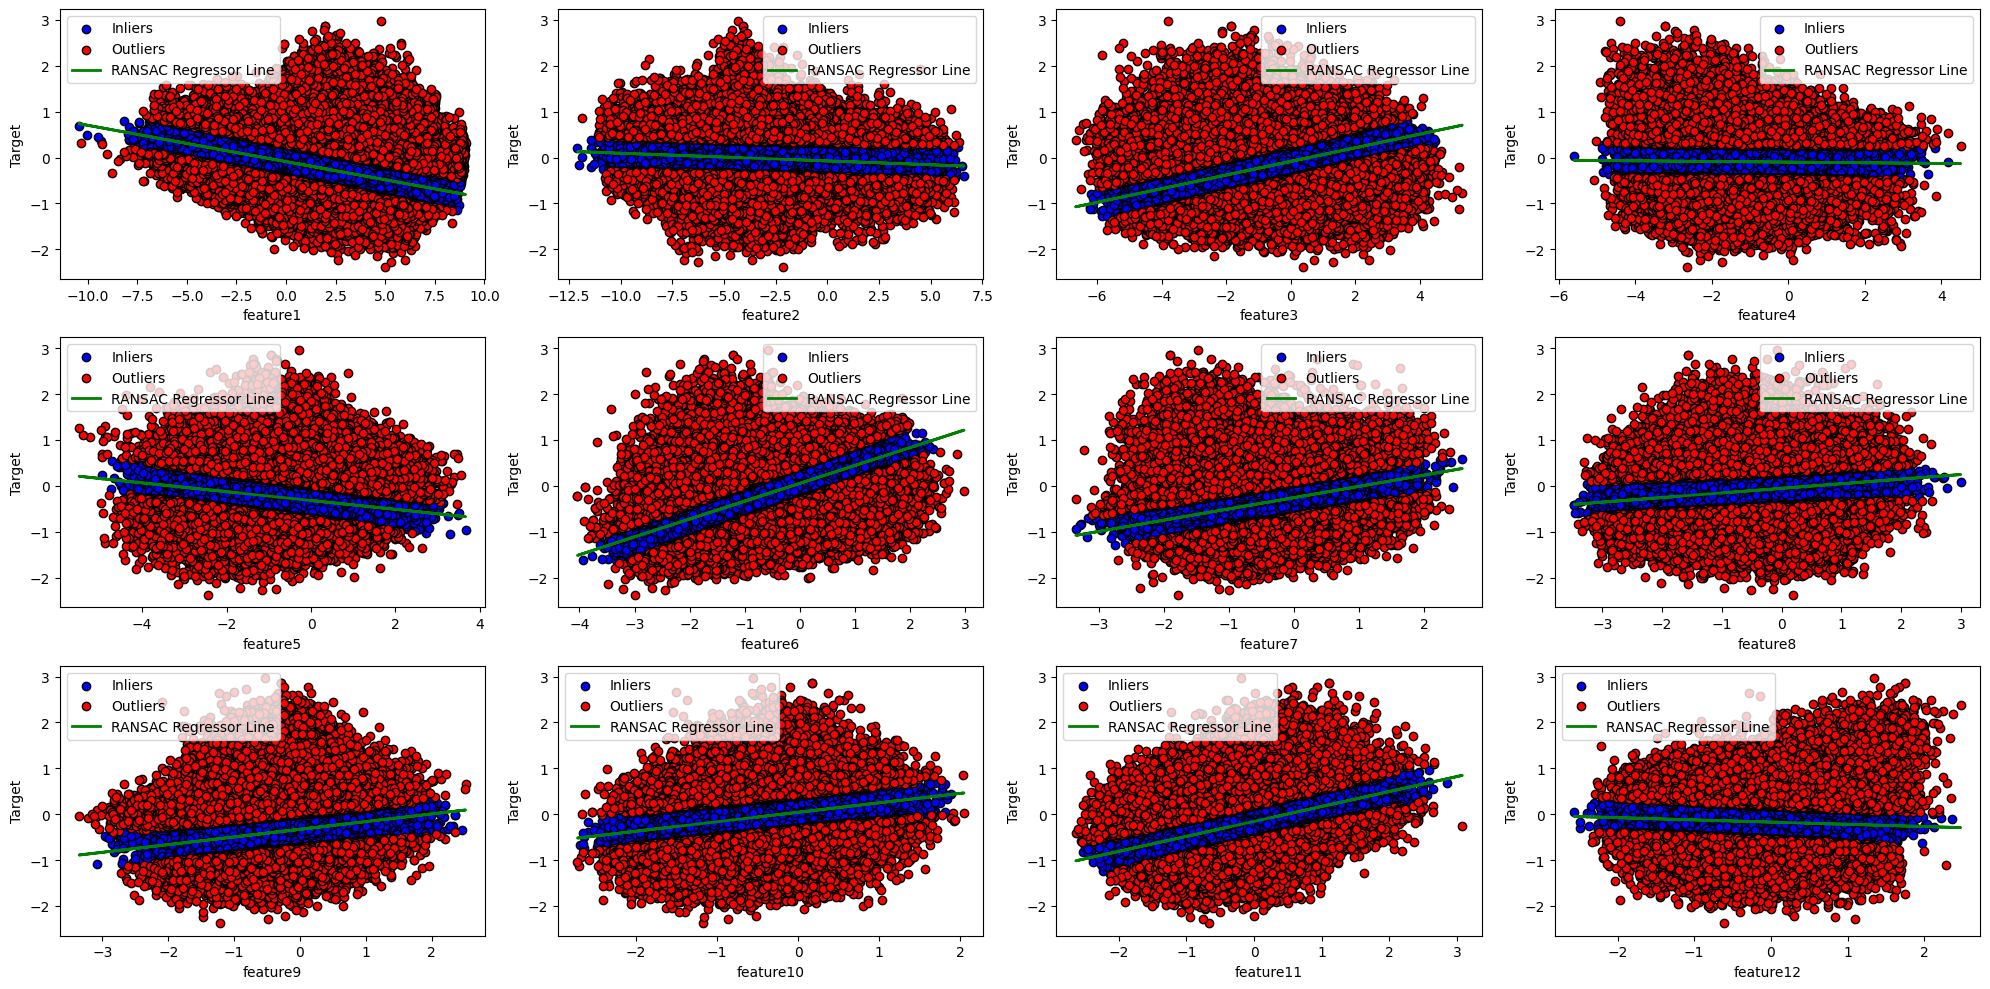

In [138]:
# Create subplots for each feature
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))
axes = axes.flatten()

# Plot RANSAC regressor line for each feature
for i, col in enumerate(X_trainrr.columns):
    # Fit RANSAC regressor to the current feature
    ransac_regressor.fit(X_trainrr[[col]], y_trainrr)
    
    # Get inliers mask
    inlier_mask = ransac_regressor.inlier_mask_
    
    # Predictions on train data
    y_pred_train = ransac_regressor.predict(X_trainrr[[col]])
    
    # Plot data points and RANSAC regressor line
    ax = axes[i]
    ax.scatter(X_trainrr[col][inlier_mask], y_trainrr[inlier_mask], c='blue', edgecolors='k', label='Inliers')
    ax.scatter(X_trainrr[col][~inlier_mask], y_trainrr[~inlier_mask], c='red', edgecolors='k', label='Outliers')
    ax.plot(X_trainrr[col], y_pred_train, color='green', linewidth=2, label='RANSAC Regressor Line')
    ax.set_xlabel(col)
    ax.set_ylabel('Target')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

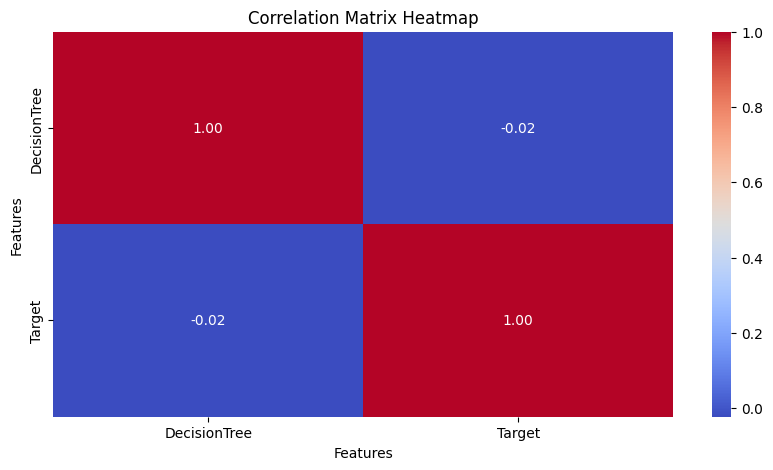

In [139]:
min_length = min(len(y_trainrr), len(y_pred_testrr))
y_trainrr = y_trainrr[:min_length]
y_pred_testrr = y_pred_testrr[:min_length]
predictions_df = pd.DataFrame({
    'DecisionTree': y_pred_testrr,
    'Target': y_traindt  # Original target values
})
limited_predictions_df = predictions_df.iloc[:100000, :100000]
correlation_matrix = limited_predictions_df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [ ]:
best_linear_model = linear_grid_search.best_estimator_
best_dt_model = dt_grid_search.best_estimator_
best_ransac_model = ransac_grid_search.best_estimator_
y_pred_linear = best_linear_model.predict(X_testlr)
y_pred_dt = best_dt_model.predict(X_testdt)
y_pred_ransac = best_ransac_model.predict(X_testrr)
mse_linear = mean_squared_error(y_testlr, y_pred_linear)
mse_dt = mean_squared_error(y_testlr, y_pred_dt)
mse_ransac = mean_squared_error(y_testlr, y_pred_ransac)
r2_linear = r2_score(y_testlr, y_pred_linear)
r2_dt = r2_score(y_testdt, y_pred_dt)
r2_ransac = r2_score(y_testrr, y_pred_ransac)

In [ ]:
print("Linear Regression:")
print("MSE:", mse_linear)
print("R-squared:", r2_linear)
print()
print("Decision Tree Regression:")
print("MSE:", mse_dt)
print("R-squared:", r2_dt)
print()
print("RANSAC Regression:")
print("MSE:", mse_ransac)
print("R-squared:", r2_ransac)

Linear Regression:
MSE: 0.22771235608984464
R-squared: 0.15067389296324707

Decision Tree Regression:
MSE: 0.213591189681099
R-squared: 0.20334330229484265

RANSAC Regression:
MSE: 0.4427743639269113
R-squared: -0.6514686917619106


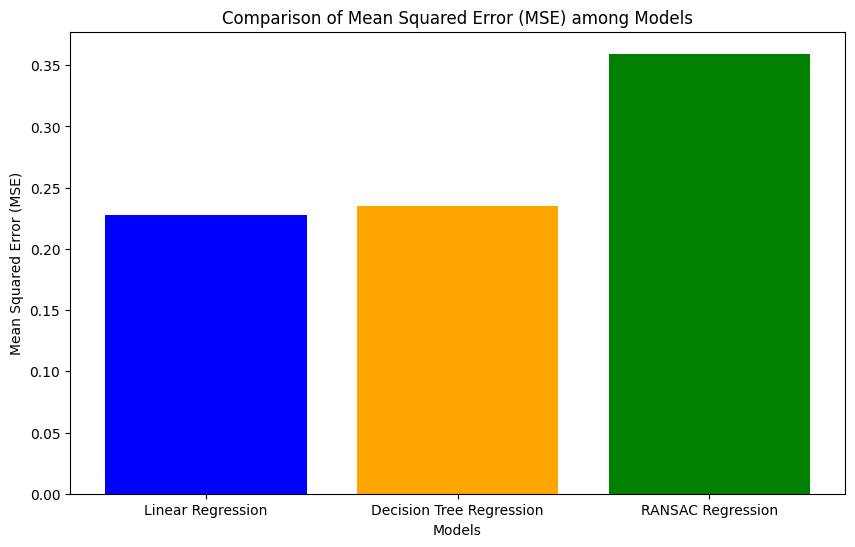

In [ ]:
models = ['Linear Regression', 'Decision Tree Regression', 'RANSAC Regression']
mse_values = [mse_testlr, mse_testdt, mse_testrr]
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) among Models')
plt.show()

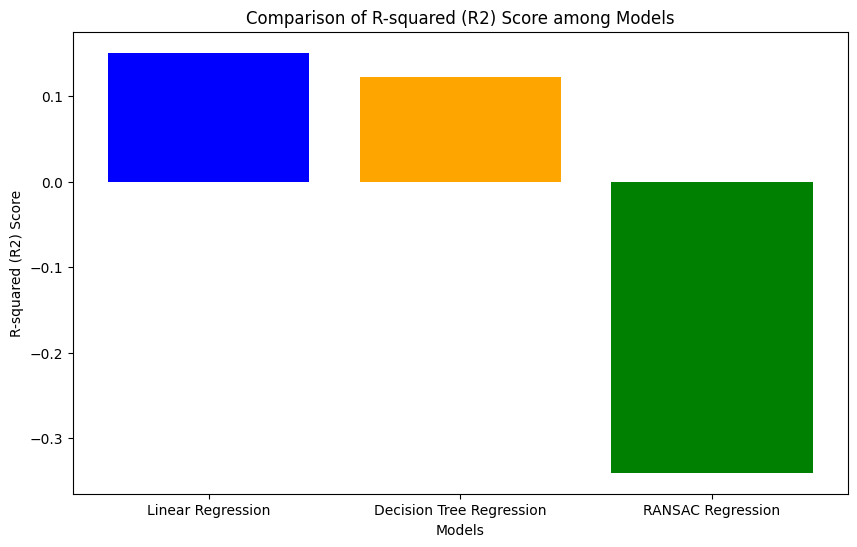

In [ ]:
# Plot R2 score
r2_values = [r2_testlr, r2_testdt, r2_testrr]
plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('R-squared (R2) Score')
plt.title('Comparison of R-squared (R2) Score among Models')
plt.show()